In [13]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Conv2D , MaxPooling2D, UpSampling2D, Conv2DTranspose, BatchNormalization, Activation, Add
from tensorflow.keras.layers import ZeroPadding2D, Input, AveragePooling2D, Flatten, Dense, Dropout, concatenate
from matplotlib import pyplot as plt

##################
# IMPORTS
##################

import tensorflow as tf
from tensorflow.compat.v1 import InteractiveSession

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

import numpy as np
import tensorflow 
from numpy.random import seed
seed(1)
tensorflow.random.set_seed(2)
import os, sys
module_path = os.path.abspath(os.path.join('../../support/'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
SAVE_MODEL = "classification-vgg-unet"
    
import DatasetUtilsTifF as dsutils

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\client\session.py:1766: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [2]:
img_width=64; img_height=64
IMG_PATH = "C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/"
TRAIN_CLASSES_PATH = "C:/Projects/VenusDenoise/out_tests/0100_1000-64-train7.csv"
VALID_CLASSES_PATH = "C:/Projects/VenusDenoise/out_tests/train_classes/0100_1000-64-7.csv"

batch_size=16
class RadianceLimits:
    pass
radiance_limits = RadianceLimits()
radiance_limits.noisy_min = 0
radiance_limits.noisy_max = 0.0898
radiance_limits.nitid_min = 0
radiance_limits.nitid_max = 0.3248

In [3]:
train_files, train_classes, train_images = \
        dsutils.readDatasetClassification(IMG_PATH, img_width, img_height, radiance_limits, TRAIN_CLASSES_PATH)



Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/
Noisy files:8738
Nitid files:8738


In [4]:
val_files, val_classes, val_images = \
    dsutils.readDatasetClassification(IMG_PATH + "validation/", img_width, img_height, radiance_limits, VALID_CLASSES_PATH)


Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/validation/
Noisy files:2208
Nitid files:2208


In [5]:
train_images = np.reshape(train_images, (len(train_images), img_height, img_width, 1))  
val_images= np.reshape(val_images, (len(val_images), img_height, img_width, 1))  

#train_classes = train_classes.squeeze()
#valid_classes = valid_classes.squeeze()

train_classes= np.reshape(train_classes, (len(train_classes), 1))  
val_classes= np.reshape(val_classes, (len(val_classes), 1))  

In [6]:
train_classes = tf.keras.utils.to_categorical( train_classes, num_classes=None, dtype='float32')
val_classes = tf.keras.utils.to_categorical( val_classes, num_classes=None, dtype='float32')

In [7]:
train_classes.shape


(8738, 4)

In [8]:
start_neurons = 8

input_layer = Input((img_width, img_height,1))

conv1 = Conv2D(start_neurons*1,(3,3), activation='relu', padding='same')(input_layer)
conv1 = Conv2D(start_neurons*1,(3,3), activation='relu', padding='same')(conv1)
pool1 = MaxPooling2D((2,2))(conv1)
pool1 = Dropout(0.25)(pool1)

conv2 = Conv2D(start_neurons*2,(3,3), activation='relu', padding='same')(pool1)
conv2 = Conv2D(start_neurons*2,(3,3), activation='relu', padding='same')(conv2)
pool2 = MaxPooling2D((2,2))(conv2)
pool2 = Dropout(0.25)(pool2)

conv3 = Conv2D(start_neurons*4,(3,3), activation='relu', padding='same')(pool2)
conv3 = Conv2D(start_neurons*4,(3,3), activation='relu', padding='same')(conv3)
pool3 = MaxPooling2D((2,2))(conv3)
pool3 = Dropout(0.25)(pool3)

conv4 = Conv2D(start_neurons*8,(3,3), activation='relu', padding='same')(pool3)
conv4 = Conv2D(start_neurons*8,(3,3), activation='relu', padding='same')(conv4)
pool4 = MaxPooling2D((2,2))(conv4)
pool4 = Dropout(0.25)(pool4)

#Middle
convm = Conv2D(start_neurons * 16, (3,3), activation='relu', padding='same')(pool4)
convm = Flatten()(convm)
output_layer = Dense(4, activation='softmax')(convm)

model = Model(input_layer, output_layer)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 8)         80        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 8)         584       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 8)         0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 16)        1168      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 16)        2320  

In [9]:
from tensorflow.keras.optimizers import Nadam
model.compile(optimizer=Nadam(learning_rate=0.00001), loss='categorical_crossentropy', metrics =['accuracy'])

In [10]:
hist = model.fit(train_images, train_classes, 
                        epochs=200,
                        batch_size=16, 
                        verbose=1, 
                        validation_data=(val_images, val_classes))


Epoch 1/200
547/547 [==============================] - 13s 15ms/step - loss: 1.1692 - accuracy: 0.5596 - val_loss: 1.3762 - val_accuracy: 0.2812
Epoch 2/200
547/547 [==============================] - 8s 15ms/step - loss: 1.0709 - accuracy: 0.5600 - val_loss: 1.3866 - val_accuracy: 0.2812
Epoch 3/200
547/547 [==============================] - 8s 15ms/step - loss: 1.0624 - accuracy: 0.5600 - val_loss: 1.4072 - val_accuracy: 0.2812
Epoch 4/200
547/547 [==============================] - 8s 15ms/step - loss: 1.0568 - accuracy: 0.5600 - val_loss: 1.4096 - val_accuracy: 0.2812
Epoch 5/200
547/547 [==============================] - 8s 15ms/step - loss: 1.0493 - accuracy: 0.5600 - val_loss: 1.4238 - val_accuracy: 0.2812
Epoch 6/200
547/547 [==============================] - 8s 15ms/step - loss: 1.0373 - accuracy: 0.5600 - val_loss: 1.4408 - val_accuracy: 0.2812
Epoch 7/200
547/547 [==============================] - 8s 15ms/step - loss: 1.0182 - accuracy: 0.5600 - val_loss: 1.4586 - val_accuracy

547/547 [==============================] - 9s 16ms/step - loss: 0.9101 - accuracy: 0.6307 - val_loss: 1.4142 - val_accuracy: 0.3487
Epoch 58/200
547/547 [==============================] - 8s 15ms/step - loss: 0.9081 - accuracy: 0.6324 - val_loss: 1.4436 - val_accuracy: 0.3478
Epoch 59/200
547/547 [==============================] - 8s 15ms/step - loss: 0.9079 - accuracy: 0.6320 - val_loss: 1.4170 - val_accuracy: 0.3492
Epoch 60/200
547/547 [==============================] - 8s 16ms/step - loss: 0.9091 - accuracy: 0.6324 - val_loss: 1.4257 - val_accuracy: 0.3483
Epoch 61/200
547/547 [==============================] - 8s 15ms/step - loss: 0.9087 - accuracy: 0.6279 - val_loss: 1.4181 - val_accuracy: 0.3478
Epoch 62/200
547/547 [==============================] - 8s 15ms/step - loss: 0.9079 - accuracy: 0.6324 - val_loss: 1.4267 - val_accuracy: 0.3533
Epoch 63/200
547/547 [==============================] - 8s 15ms/step - loss: 0.9071 - accuracy: 0.6330 - val_loss: 1.4369 - val_accuracy: 0.348

547/547 [==============================] - 9s 16ms/step - loss: 0.8991 - accuracy: 0.6321 - val_loss: 1.4091 - val_accuracy: 0.3542
Epoch 114/200
547/547 [==============================] - 8s 15ms/step - loss: 0.8995 - accuracy: 0.6310 - val_loss: 1.4049 - val_accuracy: 0.3591
Epoch 115/200
547/547 [==============================] - 9s 16ms/step - loss: 0.9003 - accuracy: 0.6304 - val_loss: 1.3832 - val_accuracy: 0.3578
Epoch 116/200
547/547 [==============================] - 8s 15ms/step - loss: 0.8995 - accuracy: 0.6318 - val_loss: 1.4048 - val_accuracy: 0.3578
Epoch 117/200
547/547 [==============================] - 8s 15ms/step - loss: 0.8988 - accuracy: 0.6286 - val_loss: 1.4111 - val_accuracy: 0.3587
Epoch 118/200
547/547 [==============================] - 8s 15ms/step - loss: 0.8986 - accuracy: 0.6315 - val_loss: 1.4027 - val_accuracy: 0.3623
Epoch 119/200
547/547 [==============================] - 8s 16ms/step - loss: 0.9003 - accuracy: 0.6302 - val_loss: 1.3860 - val_accuracy:

547/547 [==============================] - 8s 15ms/step - loss: 0.8947 - accuracy: 0.6339 - val_loss: 1.3999 - val_accuracy: 0.3632
Epoch 170/200
547/547 [==============================] - 9s 16ms/step - loss: 0.8924 - accuracy: 0.6352 - val_loss: 1.3925 - val_accuracy: 0.3614
Epoch 171/200
547/547 [==============================] - 8s 15ms/step - loss: 0.8957 - accuracy: 0.6341 - val_loss: 1.3838 - val_accuracy: 0.3605
Epoch 172/200
547/547 [==============================] - 8s 15ms/step - loss: 0.8932 - accuracy: 0.6324 - val_loss: 1.3852 - val_accuracy: 0.3587
Epoch 173/200
547/547 [==============================] - 9s 16ms/step - loss: 0.8954 - accuracy: 0.6348 - val_loss: 1.3817 - val_accuracy: 0.3596
Epoch 174/200
547/547 [==============================] - 8s 16ms/step - loss: 0.8933 - accuracy: 0.6314 - val_loss: 1.3965 - val_accuracy: 0.3569
Epoch 175/200
547/547 [==============================] - 9s 16ms/step - loss: 0.8934 - accuracy: 0.6331 - val_loss: 1.3795 - val_accuracy:

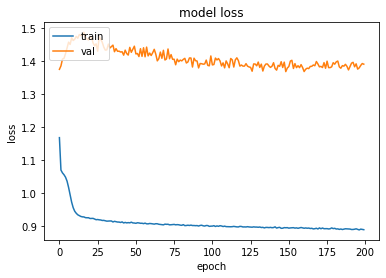

In [11]:
##################
# REPORTS
##################
import ReportsK as reports
reports.plotHistory( hist )

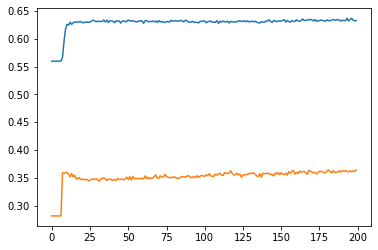

In [12]:

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

In [15]:
model.save(os.path.abspath(os.path.join('../../../saves/', "classification-vgg-unet")), model)

INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\classification-vgg-unet\assets
